# Homework 1 - Solution

This first part of Homework 1 focuses on the root finding methods.


#### #1 Bisection

In this question you were asked to plot the function $f(x) = exp(-x^{2})-2x+3$ and then determine the input required for the bisection method. Remember that the goal of the bisection method is to find the root of the function. Therefore you need to have a previous guess for the two inputs $a$ and $b$ that bracket root $x_0$.

In [92]:
import numpy as np
# Import matplotlib and niceplots for plotting
import matplotlib.pyplot as plt

Let's first define the function $f$.

In [93]:
def func(x):
    return np.exp(-x**2)-2*x+3

Then in order to have a good guess for $a$ and $b$ we plot $f$.

(0.5, 2.5)

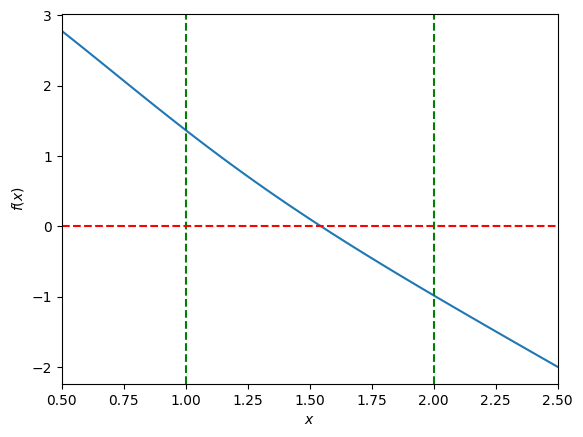

In [94]:
x = np.linspace(0.5, 2.5, 100)
plt.plot(x, func(x))
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.axvline(1,color='green',linestyle='--')
plt.axvline(2,color='green',linestyle='--')
plt.axhline(0,color='red',linestyle='--')
plt.xlim(x.min(), x.max())

Apparently $[1,2]$ could be a good initial guess.

In [95]:
a = 1
b = 2

Now we define the bisection method as given in the Week $1$.

In [96]:
def bisection(f, a, b, tol=1e-6, max_iterations=100):
    # First, check that a and b do actually bracket a root
    fa = f(a)
    fb = f(b)
    f_history = []

    if fa * fb > 0:
        raise ValueError("Initial interval does not bracket a root.")

    for i in range(max_iterations):
        c = (a + b) / 2
        fc = f(c)
        f_history.append(abs(float(fc)))

        print(f"Iteration {i:02d}: x = {c: 7.6e}, f(x) = {fc: 7.6e}")

        if np.abs(fc) < tol:
            return c, f_history

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (
        None,
        f_history,
    )  # Return None as the root if the root was not found within max_iterations

And then we run the method for the function we have defined and the initial guess for the bracket. We print the value of $x$ and the residuals $f(x)$ for each iteration.

In [97]:
root, bisect_history = bisection(func, a, b)
if root is not None:
    print("Root found:", root)
else:
    print("Root not found within max_iterations")

Iteration 00: x =  1.500000e+00, f(x) =  1.053992e-01
Iteration 01: x =  1.750000e+00, f(x) = -4.532294e-01
Iteration 02: x =  1.625000e+00, f(x) = -1.786833e-01
Iteration 03: x =  1.562500e+00, f(x) = -3.796163e-02
Iteration 04: x =  1.531250e+00, f(x) =  3.337341e-02
Iteration 05: x =  1.546875e+00, f(x) = -2.378555e-03
Iteration 06: x =  1.539062e+00, f(x) =  1.547608e-02
Iteration 07: x =  1.542969e+00, f(x) =  6.543454e-03
Iteration 08: x =  1.544922e+00, f(x) =  2.081126e-03
Iteration 09: x =  1.545898e+00, f(x) = -1.490447e-04
Iteration 10: x =  1.545410e+00, f(x) =  9.659580e-04
Iteration 11: x =  1.545654e+00, f(x) =  4.084360e-04
Iteration 12: x =  1.545776e+00, f(x) =  1.296905e-04
Iteration 13: x =  1.545837e+00, f(x) = -9.678421e-06
Iteration 14: x =  1.545807e+00, f(x) =  6.000570e-05
Iteration 15: x =  1.545822e+00, f(x) =  2.516356e-05
Iteration 16: x =  1.545830e+00, f(x) =  7.742550e-06
Iteration 17: x =  1.545834e+00, f(x) = -9.679404e-07
Root found: 1.54583358764648

Let's plot the convergence history.

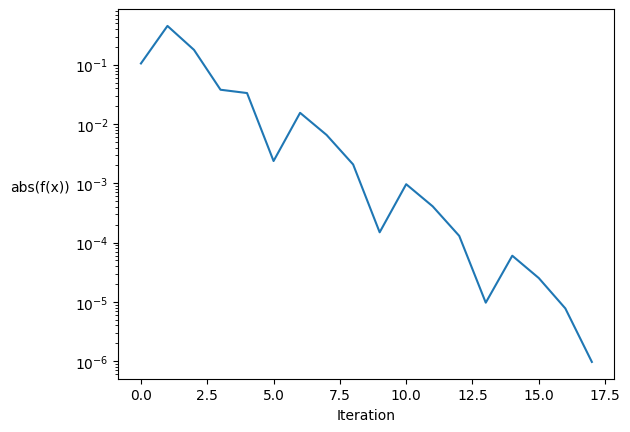

In [98]:
fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("abs(f(x))", rotation="horizontal", ha="right")

# Convergence plots like this look better when the y-axis is logarithmic
ax.set_yscale("log")
ax.plot(bisect_history)

#### #2 Projection Newton-Raphson

In this problem your are asked to project a point $(x_0,y_0)$ to the curve of the $exp$ function. 

We first define the function.

In [99]:
def func(x):
    return np.exp(x)

Then we define coordinated of the point to be projected.

In [100]:
x0 = 1.5
y0 = 1

We plot the function and the point.

(0.0, 3.0)

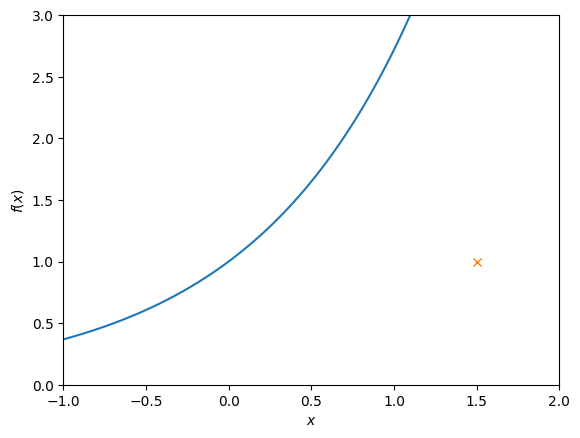

In [101]:
x = np.linspace(-1, 2, 100)
plt.plot(x, func(x))
plt.plot(x0,y0,'x')
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.xlim(x.min(), x.max())
plt.ylim(0,3)

In order to obtain the projection we define the distance between a point located on the curve of wich coordinates are $(x,f(x))$ and point $(x_0,y_0)$ : $$l^{2}(x)=(x-x_0)^{2}+(f(x)-y_0)^{2}$$
The idea is to find  a value $x_{min}$ that minimizes the distance (i.e. the value of $l^{2}$) to point $(x_0,y_0)$. Therefore $x_{min}$ is the solution to the following equation : $$\frac{\partial l^{2}}{\partial x}=0$$
$$2(x-x_0)+2f^{'}(x)(f(x)-y_0)=0$$
$$2(x-x_0)+2e^{x}(e^{x}-y_0)=0$$
To solve this equation, we use Newton Raphson method. The method requires an initial guess as an input that should not be too far away from the root. According to the above plot $x_{init}=1.0$ seems to be a good guess. The method also needs the function from which we search the root and its derivatives that we provide in the code below.


In [102]:
def norm(x,x0,y0):
    return((x-x0)**2+(np.exp(x)-y0)**2)

def norm_prime(x,x0,y0):
    return(2*(x-x0)+2*np.exp(x)*(np.exp(x)-y0))

def norme_double_prime(x,x0,y0):
    return(2+2*(np.exp(x)*(np.exp(x)-y0)+np.exp(x)**2))

We define the Newton-Raphson method exactly as it was done in the code provided in Week $1$ except that we add the parameters $x_0$ and $y_0$ to the function inside the code.

In [103]:
def newton_raphson(f, xinit, tol=1e-6, max_iterations=100):
    x = xinit
    f_history = []
    for i in range(max_iterations):
        f_val = f(x,x0,y0)
        f_history.append(abs(float(f_val)))
        print(f"Iteration {i:02d}: x = {x: 7.3e}, f(x) = {f_val: 7.3e}")

        # If f(x) is close enough to zero, we are done
        if np.abs(f_val) < tol:
            return x_new, f_history
        
        f_prime_val = norme_double_prime(x,x0,y0)

        # Otherwise, take a Newton-Raphson step
        x_new = x - f_val / f_prime_val
        x = x_new

    return (
        None,
        f_history,
    )  # Return None if the root was not found within max_iterations

In [112]:
# Initial guess
xinit = 0.5

root, newton_history = newton_raphson(norm_prime, xinit)
if root is not None:
    print("Root found:", root)
else:
    print("Root not found within max_iterations")

Iteration 00: x =  5.000e-01, f(x) =  1.139e+00
Iteration 01: x =  3.810e-01, f(x) =  1.199e-01
Iteration 02: x =  3.653e-01, f(x) =  1.730e-03
Iteration 03: x =  3.651e-01, f(x) =  3.726e-07
Root found: 0.3651168682322


In order to check that the root find makes sense, we plot $(x_0,y_0)$ and the root found.

(0.0, 3.0)

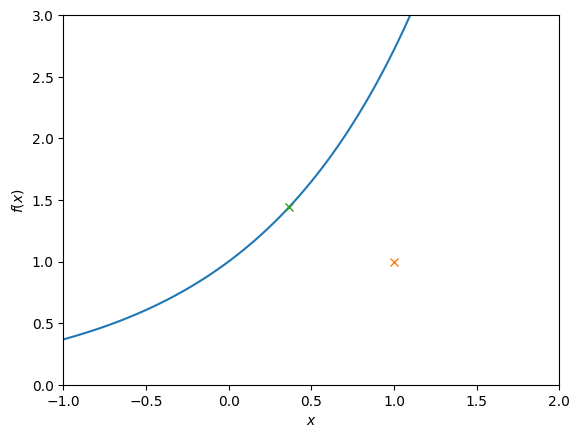

In [113]:
x = np.linspace(-1, 2, 100)
plt.plot(x, func(x))
plt.plot(x0,y0,'x')
plt.plot(root,func(root),'x')
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.xlim(x.min(), x.max())
plt.ylim(0,3)

We plot the convergence history as we did for the bisection method.

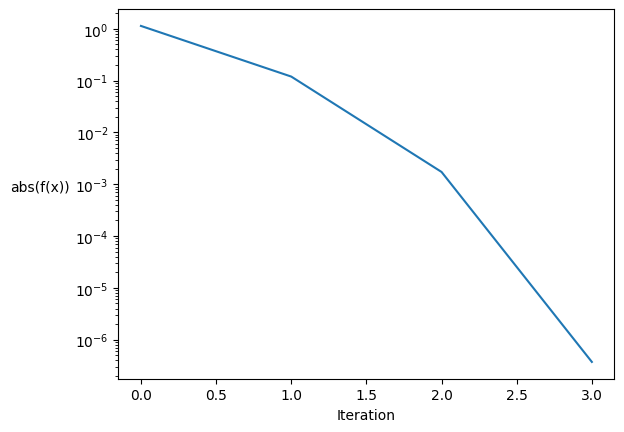

In [119]:
fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("abs(f(x))", rotation="horizontal", ha="right")

# Convergence plots like this look better when the y-axis is logarithmic
ax.set_yscale("log")
ax.plot(newton_history)

As expected the convergence is quicker for this method than for the bisection.

For the JAX version of the problem we do not compute the function symbolically anymore. We also replace all the numpy instances by JAX numpy. We then need to import the library and ass the following new header.

In [106]:
import jax.numpy as jnp
import jax 

The norm is defined with JAX numpy.

In [107]:
def norm(x,x0,y0):
    return((x-x0)**2+(jnp.exp(x)-y0)**2)

We derive the norm with the jax.grad function.

In [108]:
norm_prime=jax.grad(norm)
norme_double_prime=jax.grad(norm_prime)

Only one change needs to be done in the Newton function : the condition where the function value is within the tolerance must use jnp.

In [109]:
def newton_raphson(f, xinit, tol=1e-6, max_iterations=100):
    x = xinit
    f_history = []
    for i in range(max_iterations):
        f_val = f(x,x0,y0)
        f_history.append(abs(float(f_val)))
        print(f"Iteration {i:02d}: x = {x: 7.3e}, f(x) = {f_val: 7.3e}")

        # If f(x) is close enough to zero, we are done
        if jnp.abs(f_val) < tol:
            return x_new, f_history
        
        f_prime_val = norme_double_prime(x,x0,y0)

        # Otherwise, take a Newton-Raphson step
        x_new = x - f_val / f_prime_val
        x = x_new

    return (
        None,
        f_history,
    )  # Return None if the root was not found within max_iterations

In [110]:
# Initial guess
x0 = 1.0

root, newton_history = newton_raphson(norm_prime, x0)
if root is not None:
    print("Root found:", root)
else:
    print("Root not found within max_iterations")

Iteration 00: x =  1.000e+00, f(x) =  9.342e+00
Iteration 01: x =  6.424e-01, f(x) =  2.710e+00
Iteration 02: x =  4.282e-01, f(x) =  4.965e-01
Iteration 03: x =  3.687e-01, f(x) =  2.670e-02
Iteration 04: x =  3.651e-01, f(x) =  8.812e-05
Iteration 05: x =  3.651e-01, f(x) =  9.674e-10
Root found: 0.3651168181566722


The fact that both methods found the same root is a good indication that derivatives from first method were correctly computed.